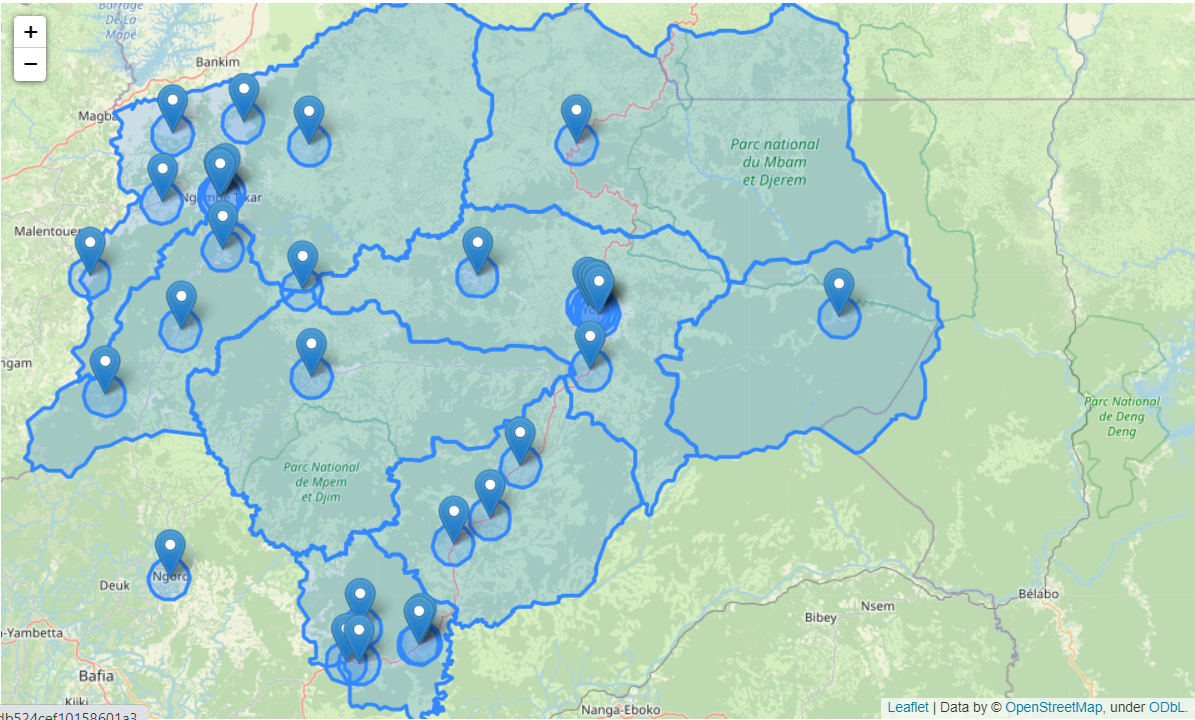

# Using data analysis and GIS tools for health district's microplanification

## Table of contents
    
| Title 1   |  Title 2   |  Title    |
|    :---   |    :---:   |    ---:   |
| Title 1   |  Title 2   |  Title    |
| Title 1   |  Title 2   |  Title 2  |
| Title 1   |  Title 2   |  Title 2  | 
| Title 1   |  Title 2   |  Title 2  |


WGS 84 / UTM zone 32N EPSG:32632

### Importations des librairies

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

### Acquisition des données

In [2]:
district = gpd.read_file('District Yoko/aires_DS_Yoko.shp')

In [3]:
type(district)

geopandas.geodataframe.GeoDataFrame

In [4]:
district.head()

OBJECTID_1  Id   Nom_AS Nom_Dist Source1     Source2  Code_AS Source3  \
0        1678   0    Doume     Yoko    None  LevÃ©s GPS  01YOO01    None   
1        1674   0    Linte     Yoko    None  LevÃ©s GPS  01YOO02    None   
2        1675   0  Makouri     Yoko    None  LevÃ©s GPS  01YOO03    None   
3        1673   0   Mankim     Yoko    None  LevÃ©s GPS  01YOO04    None   
4        1676   0   Nditam     Yoko    None  LevÃ©s GPS  01YOO05    None   

   Region         Area  Population  \
0  Centre  4774.909483        1854   
1  Centre  3279.813398        2879   
2  Centre  2600.853094         527   
3  Centre  2312.149743        4010   
4  Centre  1670.244025        4077   

                                            geometry  
0  POLYGON ((12.10599 6.16252, 12.10667 6.16374, ...  
1  POLYGON ((11.69400 5.58459, 11.69405 5.58451, ...  
2  POLYGON ((13.07743 5.51308, 13.07770 5.51280, ...  
3  POLYGON ((12.23867 5.39422, 12.23934 5.39365, ...  
4  POLYGON ((11.49125 5.75376, 11.49206 5.75365, ...

In [5]:
district.shape

(8, 12)

In [6]:
for c in district.columns:
    print(c)

OBJECTID_1
Id
Nom_AS
Nom_Dist
Source1
Source2
Code_AS
Source3
Region
Area
Population
geometry


In [7]:
district = district[['Nom_AS', 'Nom_Dist', 'Code_AS', 'Region', 'Area', 'Population', 'geometry']]

In [8]:
district

Nom_AS Nom_Dist  Code_AS  Region         Area  Population  \
0         Doume     Yoko  01YOO01  Centre  4774.909483        1854   
1         Linte     Yoko  01YOO02  Centre  3279.813398        2879   
2       Makouri     Yoko  01YOO03  Centre  2600.853094         527   
3        Mankim     Yoko  01YOO04  Centre  2312.149743        4010   
4        Nditam     Yoko  01YOO05  Centre  1670.244025        4077   
5        Ndjole     Yoko  01YOO06  Centre  1142.749743        6888   
6  Ngambe-tikar     Yoko  01YOO07  Centre  4542.151714       15472   
7          Yoko     Yoko  01YOO08  Centre  3106.349720        7454   

                                            geometry  
0  POLYGON ((12.10599 6.16252, 12.10667 6.16374, ...  
1  POLYGON ((11.69400 5.58459, 11.69405 5.58451, ...  
2  POLYGON ((13.07743 5.51308, 13.07770 5.51280, ...  
3  POLYGON ((12.23867 5.39422, 12.23934 5.39365, ...  
4  POLYGON ((11.49125 5.75376, 11.49206 5.75365, ...  
5  POLYGON ((11.81079 5.05875, 11.81053 5.05819, ...  
6  POLYGON ((11.90393 6.21608, 11.90429 6.21735, ...  
7  POLYGON ((12.04481 5.77046, 12.04614 5.76998, ...

In [9]:
district.shape

(8, 7)

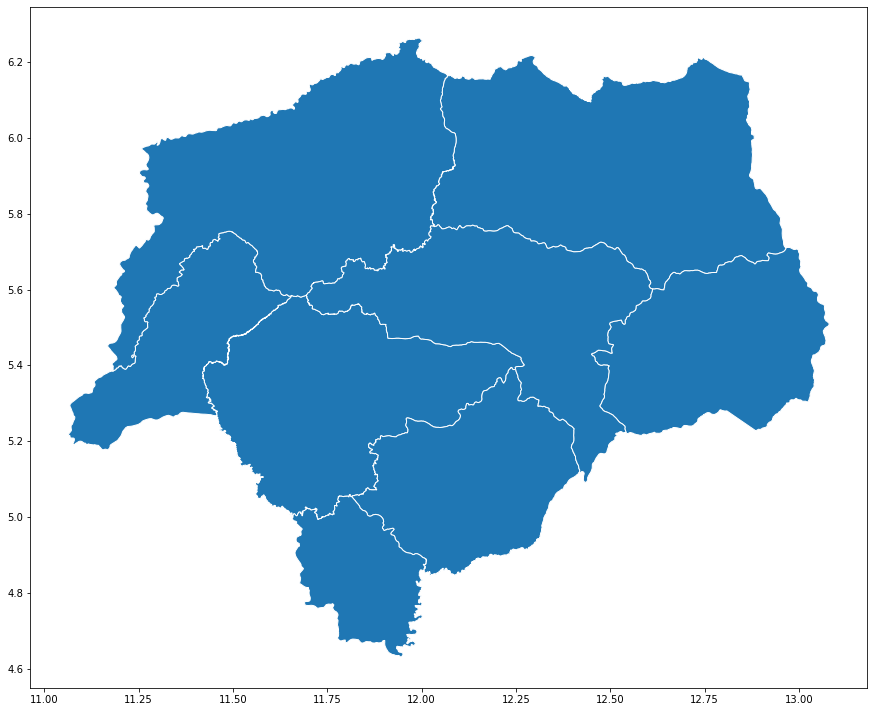

In [10]:
district.plot(figsize=(15,15), edgecolor="white")
plt.show()

In [11]:
fosas = gpd.read_file('District Yoko/FOSA_Cameroon_DISTRICT__Yoko.shp')

In [12]:
fosas.head()

REGION DISTRICT    HEALTH_ARE                        NAME PEV       Lat  \
0  Centre     Yoko  Ngambe Tikar     CASE DE SANTE MBIOKO II  No  5.612258   
1  Centre     Yoko  Ngambe Tikar     CABINET DE SOINS DENISE  No  5.796722   
2  Centre     Yoko  Ngambe Tikar  CSI PRIVE EEC NGAMBE TIKAR  No  5.788533   
3  Centre     Yoko  Ngambe Tikar             CSI BEING BEING  No  5.950427   
4  Centre     Yoko  Ngambe Tikar                     CSI GAH  No  5.774500   

         Lon             Altitude            Type           Accuracy  \
0  11.206133  710.799999999999950            Case  2.100000000000000   
1  11.501995  749.600000000000020              CS  2.100000000000000   
2  11.489917  738.399999999999980  Centre Medical  3.200000000000000   
3  11.542838  747.299999999999950  Centre Medical  2.000000000000000   
4  11.364153  716.000000000000000  Centre Medical  2.200000000000000   

                                          comments Form  \
0  CASE DE SANTE EN CONSTRUCTION PAR LA COMMUNAUTE  POI   
1                                             None  POI   
2                                             None  POI   
3                                             None  POI   
4                                             None  POI   

                   geometry  
0  POINT (11.20613 5.61226)  
1  POINT (11.50200 5.79672)  
2  POINT (11.48992 5.78853)  
3  POINT (11.54284 5.95043)  
4  POINT (11.36415 5.77450)

In [13]:
for c in fosas.columns:
    print(c)

REGION
DISTRICT
HEALTH_ARE
NAME
PEV
Lat
Lon
Altitude
Type
Accuracy
comments
Form
geometry


In [14]:
fosas = fosas[['REGION', 'DISTRICT', 'HEALTH_ARE', 'NAME', 'PEV', 'Lat', 'Lon', 'Altitude', 'Type', 'Form', 'geometry']]

In [15]:
fosas.head()

REGION DISTRICT    HEALTH_ARE                        NAME PEV       Lat  \
0  Centre     Yoko  Ngambe Tikar     CASE DE SANTE MBIOKO II  No  5.612258   
1  Centre     Yoko  Ngambe Tikar     CABINET DE SOINS DENISE  No  5.796722   
2  Centre     Yoko  Ngambe Tikar  CSI PRIVE EEC NGAMBE TIKAR  No  5.788533   
3  Centre     Yoko  Ngambe Tikar             CSI BEING BEING  No  5.950427   
4  Centre     Yoko  Ngambe Tikar                     CSI GAH  No  5.774500   

         Lon             Altitude            Type Form  \
0  11.206133  710.799999999999950            Case  POI   
1  11.501995  749.600000000000020              CS  POI   
2  11.489917  738.399999999999980  Centre Medical  POI   
3  11.542838  747.299999999999950  Centre Medical  POI   
4  11.364153  716.000000000000000  Centre Medical  POI   

                   geometry  
0  POINT (11.20613 5.61226)  
1  POINT (11.50200 5.79672)  
2  POINT (11.48992 5.78853)  
3  POINT (11.54284 5.95043)  
4  POINT (11.36415 5.77450)

In [16]:
fosas.shape

(31, 11)

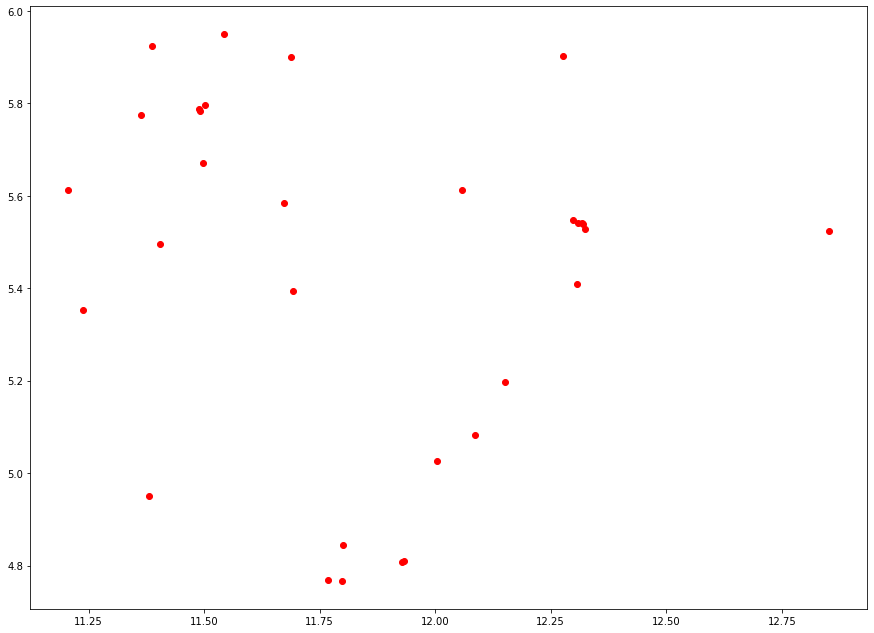

In [17]:
fosas.plot(figsize=(15,15), color='red')
plt.show()

In [18]:
type(fosas)

geopandas.geodataframe.GeoDataFrame

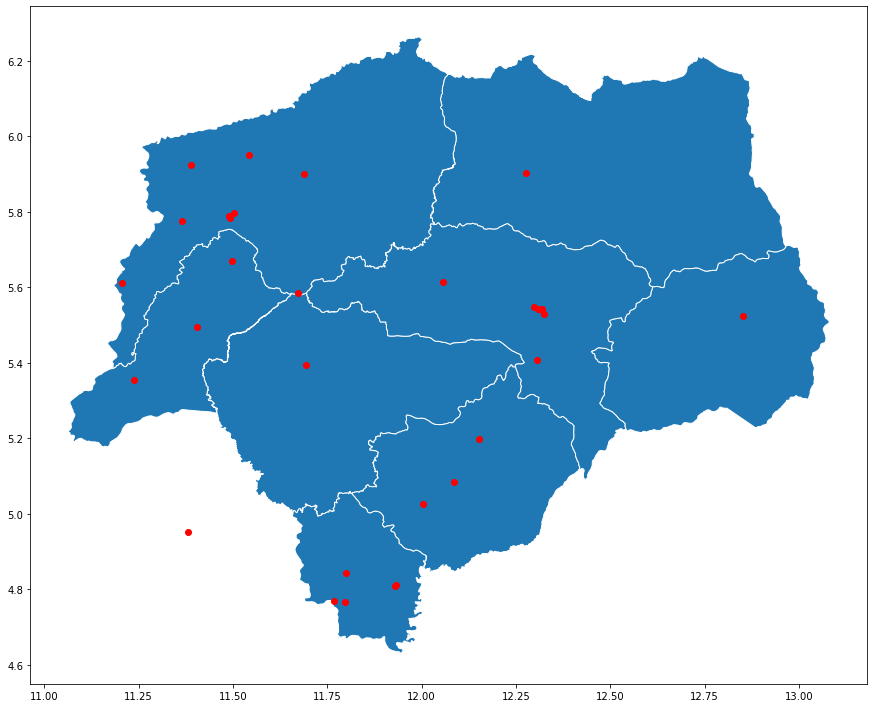

In [19]:
f, ax = plt.subplots(figsize=(15,15))
district.plot(ax=ax, edgecolor='white')
fosas.plot(ax=ax, color='red')
plt.show()

In [20]:
district.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
fosas = gpd.GeoDataFrame(fosas, geometry=fosas.geometry, crs = district.crs)

In [22]:
fosas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
type(fosas)

geopandas.geodataframe.GeoDataFrame

In [24]:
fosas.head()

REGION DISTRICT    HEALTH_ARE                        NAME PEV       Lat  \
0  Centre     Yoko  Ngambe Tikar     CASE DE SANTE MBIOKO II  No  5.612258   
1  Centre     Yoko  Ngambe Tikar     CABINET DE SOINS DENISE  No  5.796722   
2  Centre     Yoko  Ngambe Tikar  CSI PRIVE EEC NGAMBE TIKAR  No  5.788533   
3  Centre     Yoko  Ngambe Tikar             CSI BEING BEING  No  5.950427   
4  Centre     Yoko  Ngambe Tikar                     CSI GAH  No  5.774500   

         Lon             Altitude            Type Form  \
0  11.206133  710.799999999999950            Case  POI   
1  11.501995  749.600000000000020              CS  POI   
2  11.489917  738.399999999999980  Centre Medical  POI   
3  11.542838  747.299999999999950  Centre Medical  POI   
4  11.364153  716.000000000000000  Centre Medical  POI   

                   geometry  
0  POINT (11.20613 5.61226)  
1  POINT (11.50200 5.79672)  
2  POINT (11.48992 5.78853)  
3  POINT (11.54284 5.95043)  
4  POINT (11.36415 5.77450)

In [25]:
pois = pd.read_excel('Point_d_interets.xlsx')

In [26]:
pois.head()

start                            end  \
0  2021-03-29T14:41:58.171+01:00  2021-03-29T14:43:28.767+01:00   
1  2021-03-29T16:57:28.351+01:00  2021-03-29T16:58:20.926+01:00   
2  2019-12-09T15:13:05.704+01:00  2020-10-27T14:12:53.887+01:00   
3  2019-12-09T11:54:02.979+01:00  2020-10-27T14:14:59.979+01:00   
4  2019-12-09T11:58:58.366+01:00  2020-10-27T14:14:30.383+01:00   

   Point d'intérêt utile pour votre micro-planification. Veuillez géolocaliser ce point et collecter les infos à propos.  \
0                                                NaN                                                                       
1                                                NaN                                                                       
2                                                NaN                                                                       
3                                                NaN                                                                       
4                                                NaN                                                                       

  Quelle type de point voulez-vous renseignez ?  \
0                           Formation sanitaire   
1                           Formation sanitaire   
2                                        Marché   
3                                 Lieu de culte   
4                                 Lieu de culte   

  Si autre, précisez le type de site  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

  Nom du site (nom du chef de quartier, du relais communautaire... bref du site)  \
0                                Family health care                                
1                              Csp eec Ngambe tikar                                
2                                        Marché yoko                               
3                     Église évangélique luthérienne                               
4                                    Mosquée mengang                               

        Nom du quartier                Enregistrez les coordonnées du site  \
0  Quartier anglophone   5.788004437593621 11.479897091859803 683.59136...   
1                   Yah          5.788594068 11.473766618 748.23626709 4.9   
2                Megang  5.53883900412715 12.320761057916991 1024.59768...   
3               Mengang         5.482937602 12.385050439 767.324035645 4.9   
4               Mengang          5.482321581 12.38631651 805.058410645 4.9   

   _Enregistrez les coordonnées du site_latitude  \
0                                       5.788004   
1                                       5.788594   
2                                       5.538839   
3                                       5.482938   
4                                       5.482322   

   _Enregistrez les coordonnées du site_longitude  ...  \
0                                       11.479897  ...   
1                                       11.473767  ...   
2                                       12.320761  ...   
3                                       12.385050  ...   
4                                       12.386317  ...   

   Quelle type de point voulez-vous renseignez ?.1       _id  \
0                                              NaN  90642281   
1                                              NaN  90642283   
2                                              NaN  43120621   
3                                              NaN  42706520   
4                                              NaN  42706525   

                                  _uuid     _submission_time  \
0  23bc54d8-7fe0-47c2-94fb-a2e0a5333340  2021-03-30T14:31:43   
1  fede60ba-bae4-43a5-8837-d963bb84c50d  2021-03-30T14:31:44   
2  097cd409-01fb-4cba-8a07-b5d34ea1ca28  2019-12-15T09:43:39   
3  3d397b63-e1a0-4c83-8efe-96b834f9394b  2019-12-09T19

In [27]:
pois.shape

(281, 22)

In [28]:
for c in pois.columns:
    print(c)

start
end
Point d'intérêt utile pour votre micro-planification. Veuillez géolocaliser ce point et collecter les infos à propos.
Quelle type de point voulez-vous renseignez ?
Si autre, précisez le type de site
Nom du site (nom du chef de quartier, du relais communautaire... bref du site)
Nom du quartier
Enregistrez les coordonnées du site
_Enregistrez les coordonnées du site_latitude
_Enregistrez les coordonnées du site_longitude
_Enregistrez les coordonnées du site_altitude
_Enregistrez les coordonnées du site_precision
Quelle type de point voulez-vous renseignez ?.1
_id
_uuid
_submission_time
_validation_status
_notes
_status
_submitted_by
_tags
_index


In [29]:
col_dict = {
    'Quelle type de point voulez-vous renseignez ?':'Type de poi',
    'Si autre, précisez le type de site':'autre type de poi',
    'Nom du site (nom du chef de quartier, du relais communautaire... bref du site)':'Nom du poi',
    'Nom du quartier':'Quartier',
    '_Enregistrez les coordonnées du site_latitude':'Latitude',
    '_Enregistrez les coordonnées du site_longitude':'Longitude',
    '_Enregistrez les coordonnées du site_altitude':'Altitude'
}

In [30]:
pois.rename(columns=col_dict, inplace=True)

In [31]:
pois.head()

start                            end  \
0  2021-03-29T14:41:58.171+01:00  2021-03-29T14:43:28.767+01:00   
1  2021-03-29T16:57:28.351+01:00  2021-03-29T16:58:20.926+01:00   
2  2019-12-09T15:13:05.704+01:00  2020-10-27T14:12:53.887+01:00   
3  2019-12-09T11:54:02.979+01:00  2020-10-27T14:14:59.979+01:00   
4  2019-12-09T11:58:58.366+01:00  2020-10-27T14:14:30.383+01:00   

   Point d'intérêt utile pour votre micro-planification. Veuillez géolocaliser ce point et collecter les infos à propos.  \
0                                                NaN                                                                       
1                                                NaN                                                                       
2                                                NaN                                                                       
3                                                NaN                                                                       
4                                                NaN                                                                       

           Type de poi autre type de poi                      Nom du poi  \
0  Formation sanitaire               NaN             Family health care    
1  Formation sanitaire               NaN           Csp eec Ngambe tikar    
2               Marché               NaN                     Marché yoko   
3        Lieu de culte               NaN  Église évangélique luthérienne   
4        Lieu de culte               NaN                 Mosquée mengang   

               Quartier                Enregistrez les coordonnées du site  \
0  Quartier anglophone   5.788004437593621 11.479897091859803 683.59136...   
1                   Yah          5.788594068 11.473766618 748.23626709 4.9   
2                Megang  5.53883900412715 12.320761057916991 1024.59768...   
3               Mengang         5.482937602 12.385050439 767.324035645 4.9   
4               Mengang          5.482321581 12.38631651 805.058410645 4.9   

   Latitude  Longitude  ...  Quelle type de point voulez-vous renseignez ?.1  \
0  5.788004  11.479897  ...                                              NaN   
1  5.788594  11.473767  ...                                              NaN   
2  5.538839  12.320761  ...                                              NaN   
3  5.482938  12.385050  ...                                              NaN   
4  5.482322  12.386317  ...                                              NaN   

        _id                                 _uuid     _submission_time  \
0  90642281  23bc54d8-7fe0-47c2-94fb-a2e0a5333340  2021-03-30T14:31:43   
1  90642283  fede60ba-bae4-43a5-8837-d963bb84c50d  2021-03-30T14:31:44   
2  43120621  097cd409-01fb-4cba-8a07-b5d34ea1ca28  2019-12-15T09:43:39   
3  42706520  3d397b63-e1a0-4c83-8efe-96b834f9394b  2019-12-09T19:04:31   
4  42706525  26d22340-17b4-4972-be51-e1ac296ce775  2019-12-09T19:04:32   

  _validation_status _notes            _status  _submitted_by _tags _index  
0                NaN    NaN  submitted_via_web        djatche   NaN      1  
1                NaN    NaN  submitted_via_web        djatche   NaN      2  
2                NaN    NaN  submitted_via_web        djatche   NaN      3  
3                NaN    NaN  submitted_via_web        djatche   NaN      4  
4                NaN    NaN  submitted_via_web        djatche   NaN      5  

[5 rows x 22 columns]

In [32]:
cols = list(col_dict.values())

In [33]:
cols

['Type de poi',
 'autre type de poi',
 'Nom du poi',
 'Quartier',
 'Latitude',
 'Longitude',
 'Altitude']

In [34]:
pois = pois[cols]

In [35]:
pois.head()

Type de poi autre type de poi                      Nom du poi  \
0  Formation sanitaire               NaN             Family health care    
1  Formation sanitaire               NaN           Csp eec Ngambe tikar    
2               Marché               NaN                     Marché yoko   
3        Lieu de culte               NaN  Église évangélique luthérienne   
4        Lieu de culte               NaN                 Mosquée mengang   

               Quartier  Latitude  Longitude     Altitude  
0  Quartier anglophone   5.788004  11.479897   683.591363  
1                   Yah  5.788594  11.473767   748.236267  
2                Megang  5.538839  12.320761  1024.597680  
3               Mengang  5.482938  12.385050   767.324036  
4               Mengang  5.482322  12.386317   805.058411

In [36]:
pois.shape

(281, 7)

In [37]:
pois['geometry'] = pois.apply(lambda x : Point(x.Longitude, x.Latitude), axis=1)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [38]:
pois.head()

Type de poi autre type de poi                      Nom du poi  \
0  Formation sanitaire               NaN             Family health care    
1  Formation sanitaire               NaN           Csp eec Ngambe tikar    
2               Marché               NaN                     Marché yoko   
3        Lieu de culte               NaN  Église évangélique luthérienne   
4        Lieu de culte               NaN                 Mosquée mengang   

               Quartier  Latitude  Longitude     Altitude  \
0  Quartier anglophone   5.788004  11.479897   683.591363   
1                   Yah  5.788594  11.473767   748.236267   
2                Megang  5.538839  12.320761  1024.597680   
3               Mengang  5.482938  12.385050   767.324036   
4               Mengang  5.482322  12.386317   805.058411   

                                       geometry  
0  POINT (11.479897091859804 5.788004437593621)  
1              POINT (11.473766618 5.788594068)  
2   POINT (12.320761057916991 5.53883900412715)  
3              POINT (12.385050439 5.482937602)  
4               POINT (12.38631651 5.482321581)

In [39]:
pois_geo = gpd.GeoDataFrame(pois, geometry=pois.geometry, crs = district.crs)

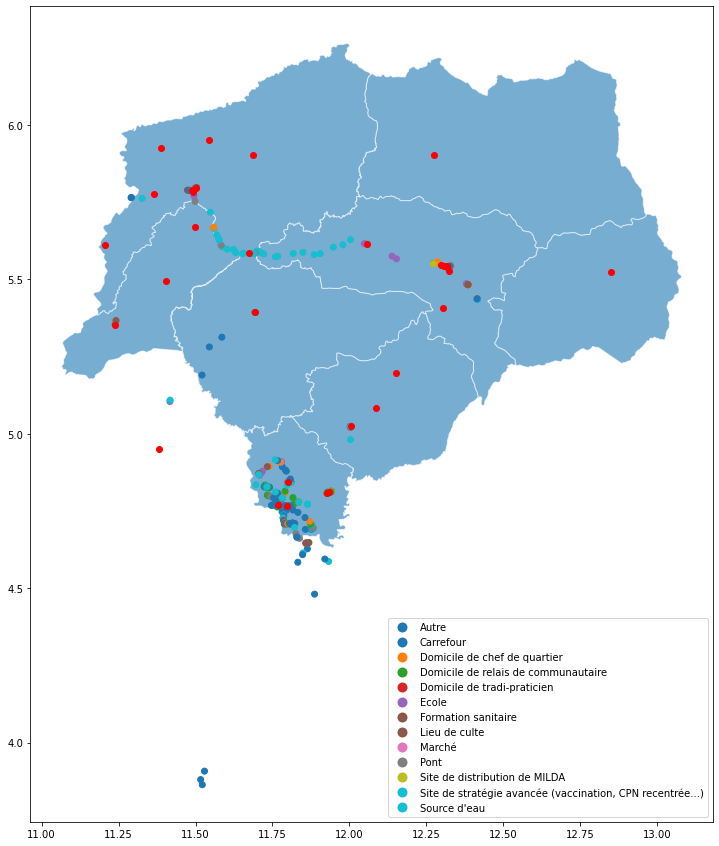

In [93]:
f, ax = plt.subplots(figsize=(15,15))
district.plot(ax=ax, edgecolor='white', alpha=0.6)
pois_geo.plot(ax=ax,column='Type de poi', legend=True)
fosas.plot(ax=ax, color='red')
plt.show()

In [41]:
djole_health_area = gpd.read_file('District Yoko/AS_Centre_Nom_AS__Ndjole.shp')

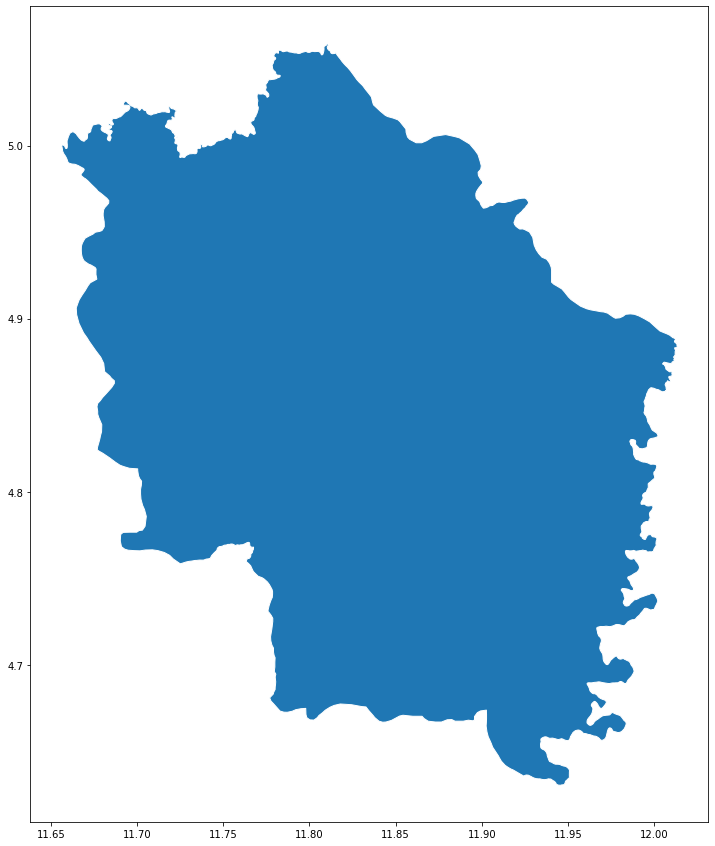

In [42]:
f, ax = plt.subplots(figsize=(15,15))
djole_health_area.plot(ax=ax, edgecolor='white')
#pois_geo.plot(ax=ax,column='Type de poi', legend=True)
#fosas.plot(ax=ax, color='red')
plt.show()

In [43]:
djole_health_area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
type(pois), type(pois_geo)

(pandas.core.frame.DataFrame, geopandas.geodataframe.GeoDataFrame)

In [45]:
pois_in_djole = gpd.sjoin(pois_geo, djole_health_area, op='within')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [46]:
pois_in_djole.head()

Type de poi autre type de poi                 Nom du poi  \
25  Lieu de culte               NaN  Mission du plein évangile   
26          Autre     Gare routière    Gare routière Minfoumbe   
27         Marché               NaN           Marché minfoumbe   
28   Source d'eau               NaN                     MEBAM    
31   Source d'eau               NaN              Forage Ndjolé   

           Quartier  Latitude  Longitude    Altitude  \
25        Minfoumbe  4.843833  11.800301  653.067566   
26        Minfoumbe  4.845788  11.801163  654.707825   
27        Minfoumbe  4.845411  11.801219  659.604919   
28  Issandja centre  4.765801  11.770559  665.143000   
31      Ndjolé nord  4.813052  11.940201  660.117493   

                    geometry  index_right  OBJECTID_1  Id  Nom_AS Nom_Dist  \
25  POINT (11.80030 4.84383)            0        1666   0  Ndjole     Yoko   
26  POINT (11.80116 4.84579)            0        1666   0  Ndjole     Yoko   
27  POINT (11.80122 4.84541)            0        1666   0  Ndjole     Yoko   
28  POINT (11.77056 4.76580)            0        1666   0  Ndjole     Yoko   
31  POINT (11.94020 4.81305)            0        1666   0  Ndjole     Yoko   

   Source1     Source2  Code_AS Source3  Region         Area  
25    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
26    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
27    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
28    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
31    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743

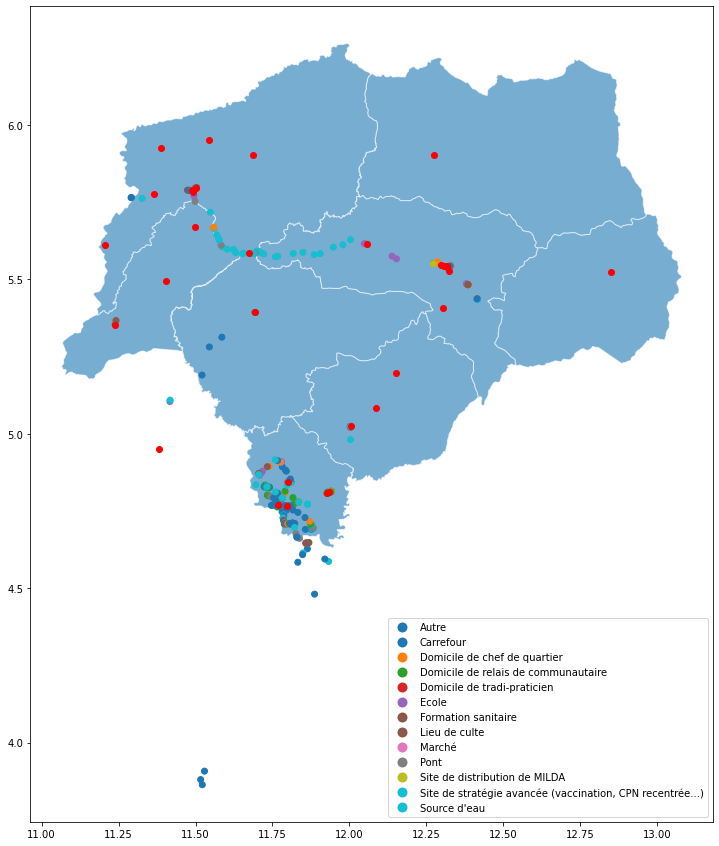

In [47]:
f, ax = plt.subplots(figsize=(15,15))
district.plot(ax=ax, edgecolor='white', alpha=0.6)
pois_geo.plot(ax=ax,column='Type de poi', legend=True)
fosas.plot(ax=ax, color='red')
plt.show()

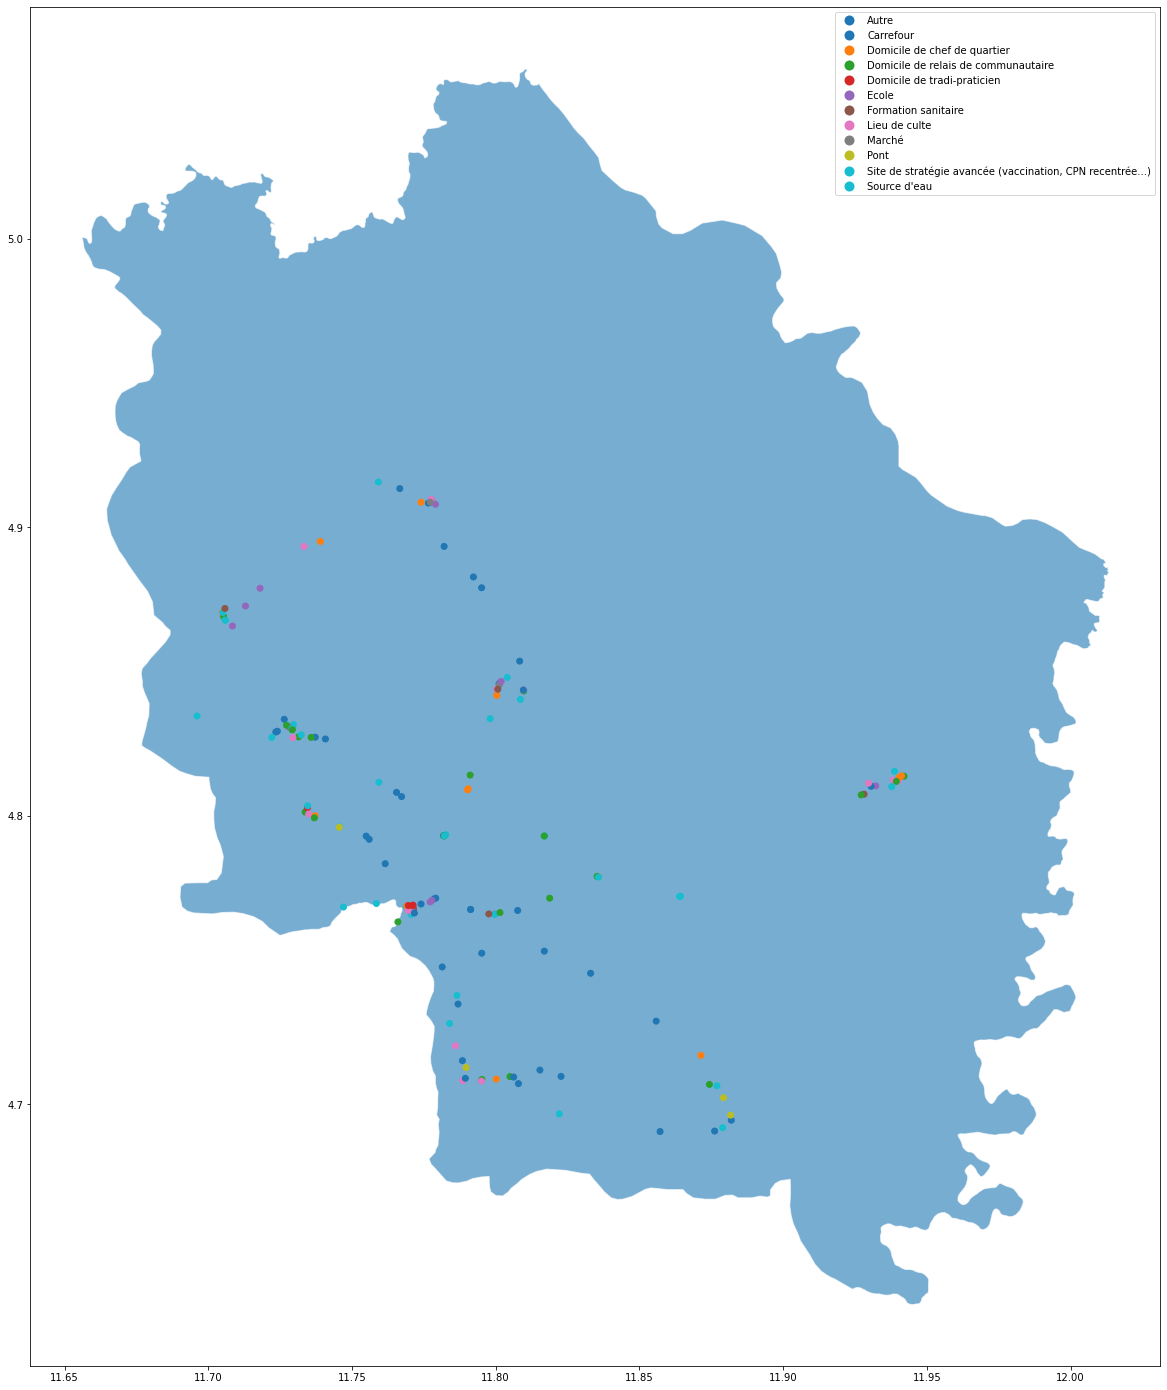

In [48]:
f, ax = plt.subplots(figsize=(25,25))
djole_health_area.plot(ax=ax, edgecolor='white', alpha=0.6)
pois_in_djole.plot(ax=ax,column='Type de poi', legend=True)
plt.show()

In [49]:
fosas_in_djole = gpd.sjoin(fosas, djole_health_area, op='within')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


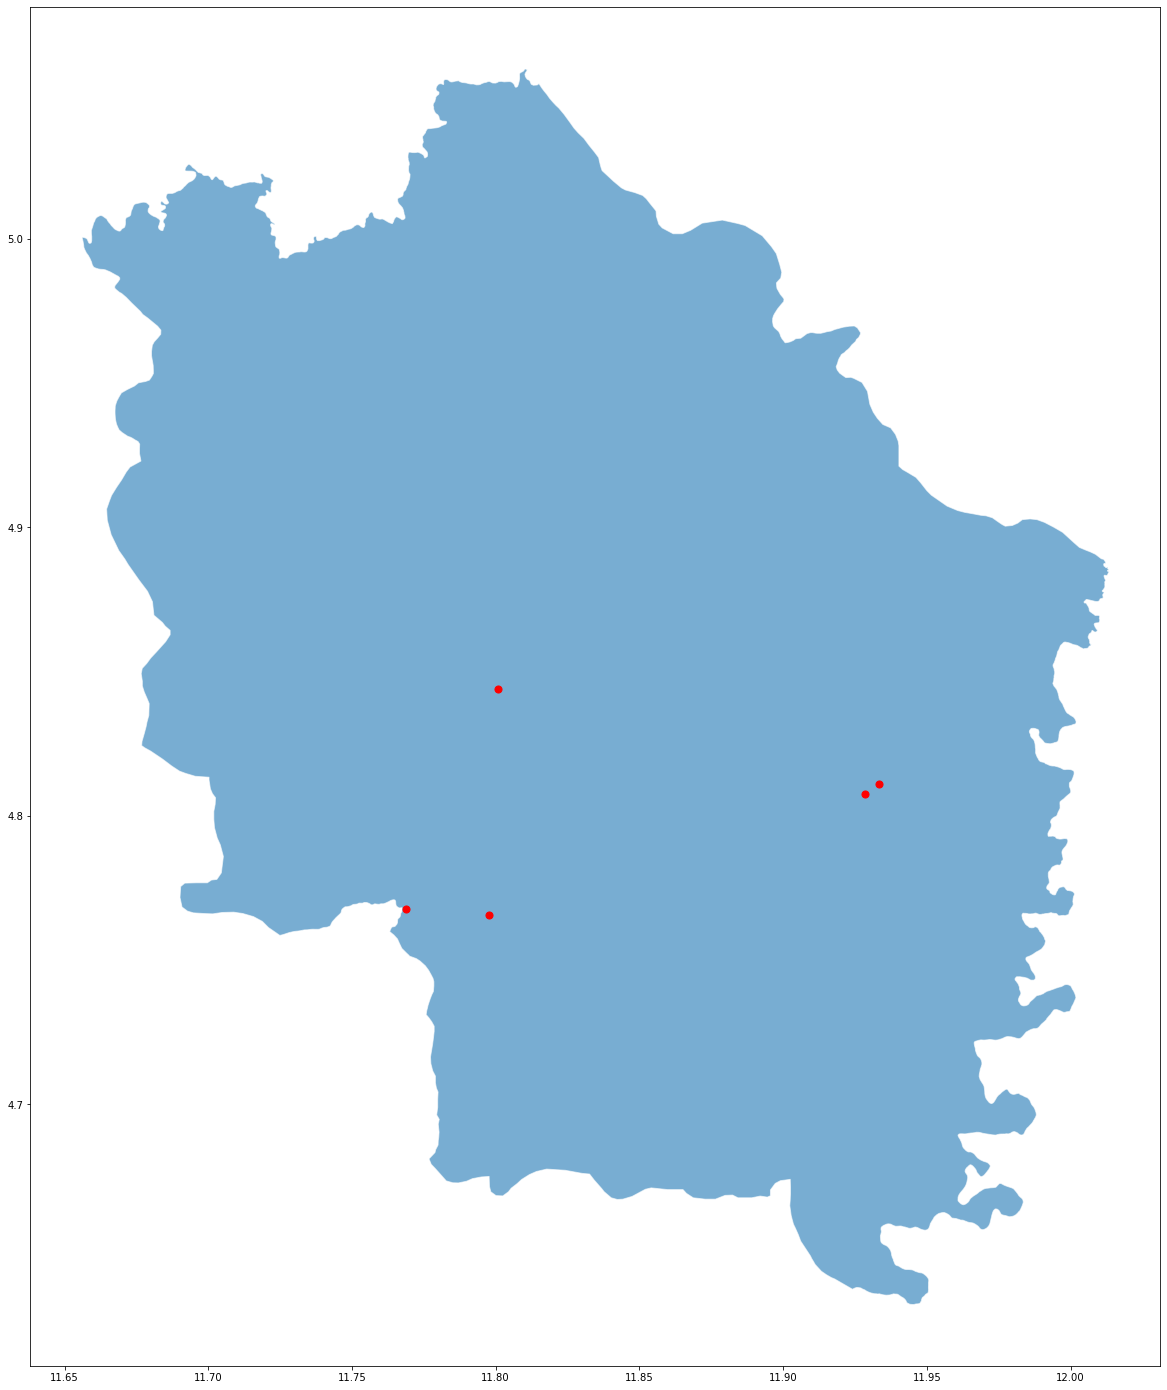

In [50]:
f, ax = plt.subplots(figsize=(25,25))
djole_health_area.plot(ax=ax, edgecolor='white', alpha=0.6)
fosas_in_djole.plot(ax=ax,color='red', markersize=50, legend=True)
plt.show()

In [51]:
pois_in_djole_utm_32632 = pois_in_djole.to_crs(epsg=32632)

In [52]:
djole_health_area_utm_32632 = djole_health_area.to_crs(epsg=32632)

In [53]:
pois_in_djole_utm_32632.head()

Type de poi autre type de poi                 Nom du poi  \
25  Lieu de culte               NaN  Mission du plein évangile   
26          Autre     Gare routière    Gare routière Minfoumbe   
27         Marché               NaN           Marché minfoumbe   
28   Source d'eau               NaN                     MEBAM    
31   Source d'eau               NaN              Forage Ndjolé   

           Quartier  Latitude  Longitude    Altitude  \
25        Minfoumbe  4.843833  11.800301  653.067566   
26        Minfoumbe  4.845788  11.801163  654.707825   
27        Minfoumbe  4.845411  11.801219  659.604919   
28  Issandja centre  4.765801  11.770559  665.143000   
31      Ndjolé nord  4.813052  11.940201  660.117493   

                         geometry  index_right  OBJECTID_1  Id  Nom_AS  \
25  POINT (810620.690 536043.169)            0        1666   0  Ndjole   
26  POINT (810715.489 536260.009)            0        1666   0  Ndjole   
27  POINT (810721.880 536218.283)            0        1666   0  Ndjole   
28  POINT (807354.018 527394.153)            0        1666   0  Ndjole   
31  POINT (826166.847 532702.056)            0        1666   0  Ndjole   

   Nom_Dist Source1     Source2  Code_AS Source3  Region         Area  
25     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
26     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
27     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
28     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
31     Yoko    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743

In [54]:
import contextily

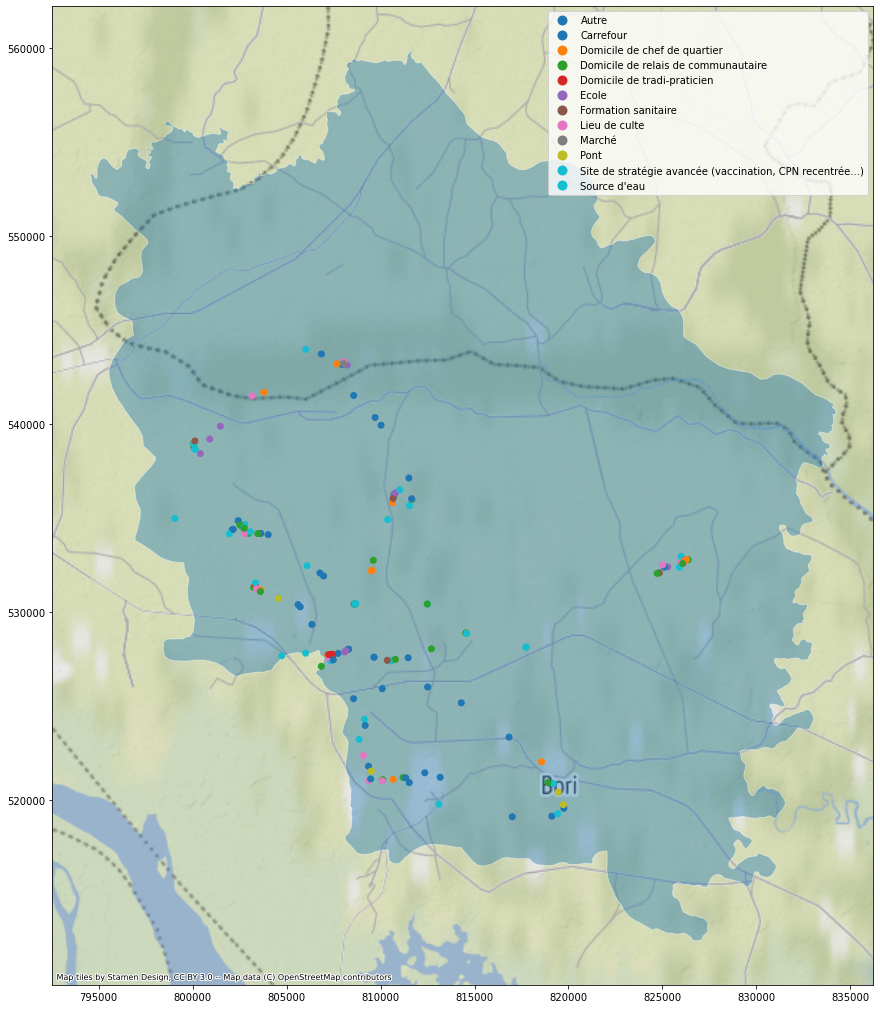

In [55]:
f, ax = plt.subplots(figsize=(18,18))
djole_health_area_utm_32632.plot(ax=ax, edgecolor='white', alpha=0.4)
pois_in_djole_utm_32632.plot(ax=ax,column='Type de poi', legend=True)
contextily.add_basemap(ax)

#for x, y, label in zip(pois_in_djole_utm_32632.geometry.x, pois_in_djole_utm_32632.geometry.y, pois_in_djole_utm_32632['Quartier']):
#   ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.show()

In [56]:
district_center = district.geometry.centroid

C:\Users\hp\AppData\Local\Temp\ipykernel_7968\2084327578.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  district_center = district.geometry.centroid


In [57]:
district_center

0    POINT (12.50024 5.92208)
1    POINT (11.77474 5.31398)
2    POINT (12.78040 5.44841)
3    POINT (12.13488 5.09885)
4    POINT (11.35948 5.45779)
5    POINT (11.83688 4.84787)
6    POINT (11.67505 5.87559)
7    POINT (12.23034 5.53889)
dtype: geometry

In [58]:
district_location = [district_center[0].y, district_center[0].x]

In [59]:
district_location

[5.922079649122402, 12.500243979581095]

In [60]:
type(district_location)

list

In [61]:
import folium
district_map = folium.Map(location=district_location, zoom_start=10)

In [62]:
display(district_map)

In [63]:
district_utm_32632 = district.to_crs(epsg=32632)
fosas_utm_32632 = fosas.to_crs(epsg=32632)
#pois_utm_32632 = pois_geo.to_crs(epsg=32632)

In [64]:
district_map = folium.Map(location=district_location, zoom_start=9)
folium.GeoJson(district_utm_32632.geometry).add_to(district_map)
folium.GeoJson(fosas_utm_32632.geometry).add_to(district_map)
display(district_map)

In [65]:
djole_center = djole_health_area.geometry.centroid

C:\Users\hp\AppData\Local\Temp\ipykernel_7968\136739247.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  djole_center = djole_health_area.geometry.centroid


In [66]:
djole_center

0    POINT (11.83688 4.84787)
dtype: geometry

In [67]:
djole_location = [djole_center.y, djole_center.x]

In [68]:
djole_location

[0    4.847866
 dtype: float64,
 0    11.836876
 dtype: float64]

In [69]:
pois_in_djole.head()

Type de poi autre type de poi                 Nom du poi  \
25  Lieu de culte               NaN  Mission du plein évangile   
26          Autre     Gare routière    Gare routière Minfoumbe   
27         Marché               NaN           Marché minfoumbe   
28   Source d'eau               NaN                     MEBAM    
31   Source d'eau               NaN              Forage Ndjolé   

           Quartier  Latitude  Longitude    Altitude  \
25        Minfoumbe  4.843833  11.800301  653.067566   
26        Minfoumbe  4.845788  11.801163  654.707825   
27        Minfoumbe  4.845411  11.801219  659.604919   
28  Issandja centre  4.765801  11.770559  665.143000   
31      Ndjolé nord  4.813052  11.940201  660.117493   

                    geometry  index_right  OBJECTID_1  Id  Nom_AS Nom_Dist  \
25  POINT (11.80030 4.84383)            0        1666   0  Ndjole     Yoko   
26  POINT (11.80116 4.84579)            0        1666   0  Ndjole     Yoko   
27  POINT (11.80122 4.84541)            0        1666   0  Ndjole     Yoko   
28  POINT (11.77056 4.76580)            0        1666   0  Ndjole     Yoko   
31  POINT (11.94020 4.81305)            0        1666   0  Ndjole     Yoko   

   Source1     Source2  Code_AS Source3  Region         Area  
25    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
26    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
27    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
28    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743  
31    None  LevÃ©s GPS  01YOO06    None  Centre  1142.749743

In [70]:
djole_map = folium.Map(location=djole_location, zoom_start=11)
folium.GeoJson(djole_health_area.geometry).add_to(djole_map)
folium.GeoJson(pois_in_djole.geometry).add_to(djole_map)
display(djole_map)

In [71]:
djole_map = folium.Map(location=djole_location, zoom_start=11)
folium.GeoJson(djole_health_area.geometry).add_to(djole_map)
#folium.GeoJson(pois_in_djole.geometry).add_to(djole_map)
# Create a location and marker with each iteration for the djole_map
for row in pois_in_djole.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    popup =  str(row_values['Type de poi']) + ' ' + str(row_values['Nom du poi'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(djole_map)

# Display the map
display(djole_map)

### Convert to utm projection

In [72]:
district_utm_32632 = district.to_crs(epsg=32632)
fosas_utm_32632 = fosas.to_crs(epsg=32632)
pois_utm_32632 = pois_geo.to_crs(epsg=32632)

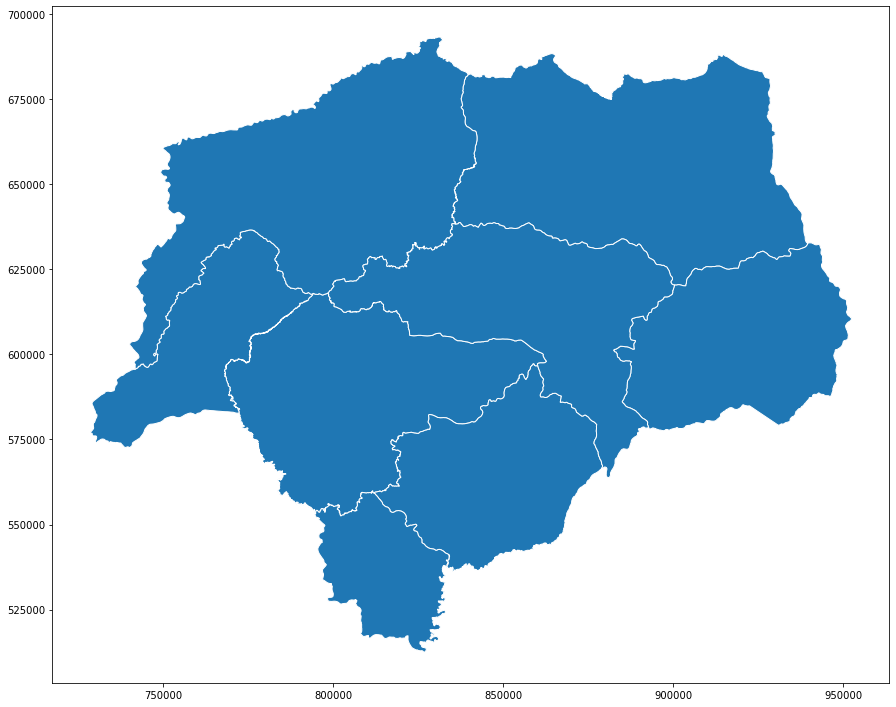

In [73]:
district_utm_32632.plot(figsize=(15,15), edgecolor='white')
plt.show()

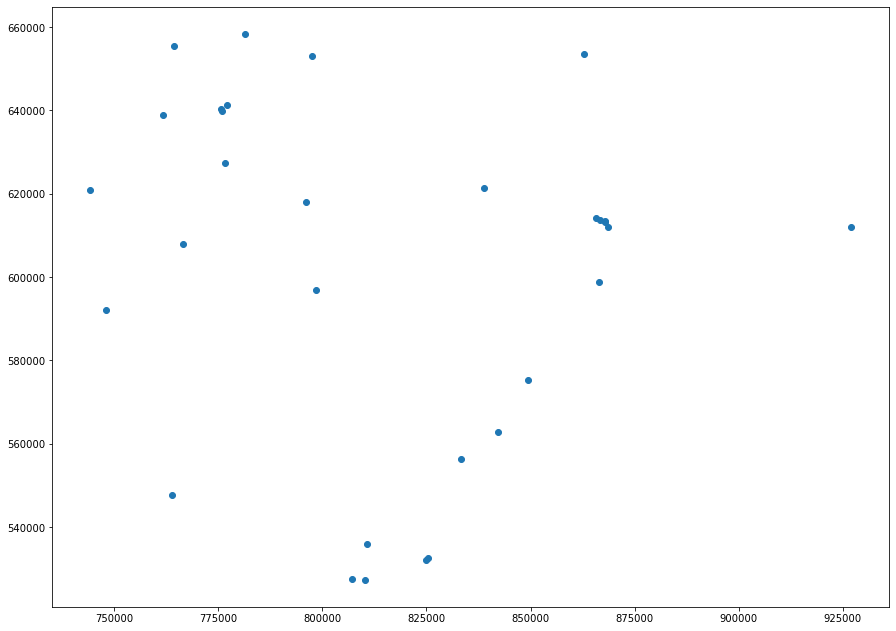

In [74]:
fosas_utm_32632.plot(figsize=(15,15))
plt.show()

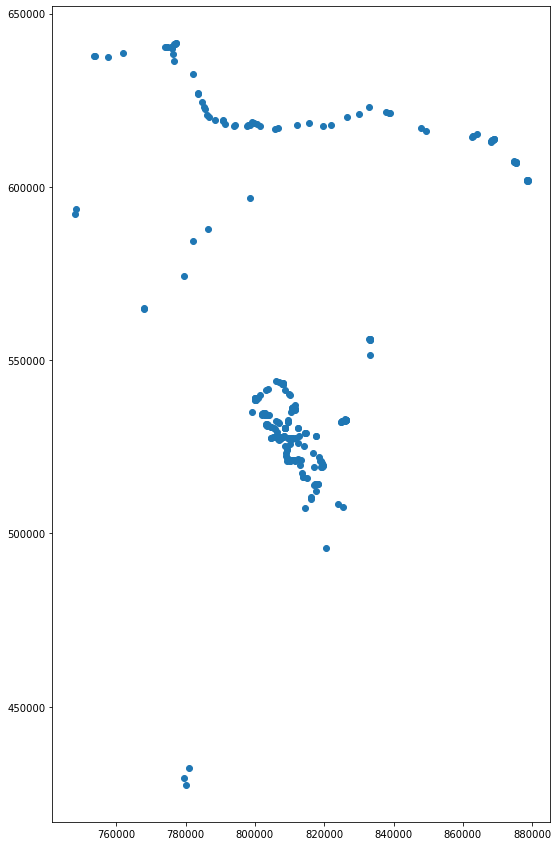

In [75]:
pois_utm_32632.plot(figsize=(15,15))
plt.show()

### Save to a file

In [76]:
# Write converted data to a file
district_utm_32632.to_file("data_output/district_utm_32632.gpkg",driver="GPKG")
district_utm_32632.to_file("data_output/district_utm_32632.shp",driver="ESRI Shapefile")

In [77]:
# Write converted data to a file
pois_utm_32632.to_file("data_output/pois_utm_32632",driver="GPKG")
pois_utm_32632.to_file("data_output/pois_utm_32632.shp",driver="ESRI Shapefile")

C:\Users\hp\AppData\Local\Temp\ipykernel_7968\1626141433.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pois_utm_32632.to_file("data_output/pois_utm_32632.shp",driver="ESRI Shapefile")


In [78]:
# Write converted data to a file
fosas_utm_32632.to_file("data_output/fosa_utm_32632.gpkg",driver="GPKG")
fosas_utm_32632.to_file("data_output/fosa_utm_32632.shp",driver="ESRI Shapefile")

### distance

In [79]:
district_utm_32632

Nom_AS Nom_Dist  Code_AS  Region         Area  Population  \
0         Doume     Yoko  01YOO01  Centre  4774.909483        1854   
1         Linte     Yoko  01YOO02  Centre  3279.813398        2879   
2       Makouri     Yoko  01YOO03  Centre  2600.853094         527   
3        Mankim     Yoko  01YOO04  Centre  2312.149743        4010   
4        Nditam     Yoko  01YOO05  Centre  1670.244025        4077   
5        Ndjole     Yoko  01YOO06  Centre  1142.749743        6888   
6  Ngambe-tikar     Yoko  01YOO07  Centre  4542.151714       15472   
7          Yoko     Yoko  01YOO08  Centre  3106.349720        7454   

                                            geometry  
0  POLYGON ((843800.911 682170.890, 843875.524 68...  
1  POLYGON ((798469.468 617967.738, 798475.831 61...  
2  POLYGON ((952008.387 610927.179, 952038.196 61...  
3  POLYGON ((858986.080 597196.016, 859061.664 59...  
4  POLYGON ((775912.688 636586.143, 776002.396 63...  
5  POLYGON ((811684.263 559833.509, 811655.520 55...  
6  POLYGON ((821382.317 687973.529, 821422.004 68...  
7  POLYGON ((837262.379 638732.117, 837410.227 63...

In [80]:
district_center = district_utm_32632.geometry.centroid

In [81]:
district_center

0    POINT (887680.966 655813.952)
1    POINT (807565.742 588063.506)
2    POINT (919081.207 603547.532)
3    POINT (847637.085 564438.009)
4    POINT (761438.715 603781.018)
5    POINT (814681.368 536504.638)
6    POINT (796222.146 650165.911)
7    POINT (857990.710 613205.062)
dtype: geometry

### distances entre centroides

In [82]:
for d in district_center:
    print(district_center[7].distance(d)/1000)

51.93292576025577
56.345143651645245
61.84914532764846
49.854016863039924
97.01082590106152
88.08322334870881
71.98235751021437
0.0


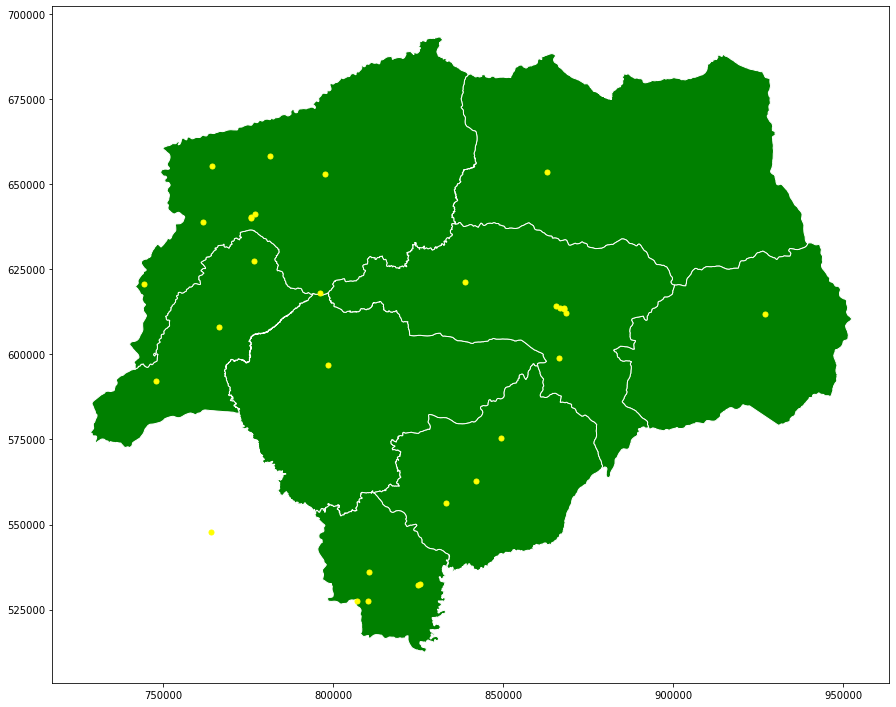

In [83]:
# Plot of the parks and mining sites
ax = district_utm_32632.plot(figsize=(15,15), color='green', edgecolor='white')
fosas_utm_32632.plot(ax=ax, markersize=25, color='yellow')
plt.show()

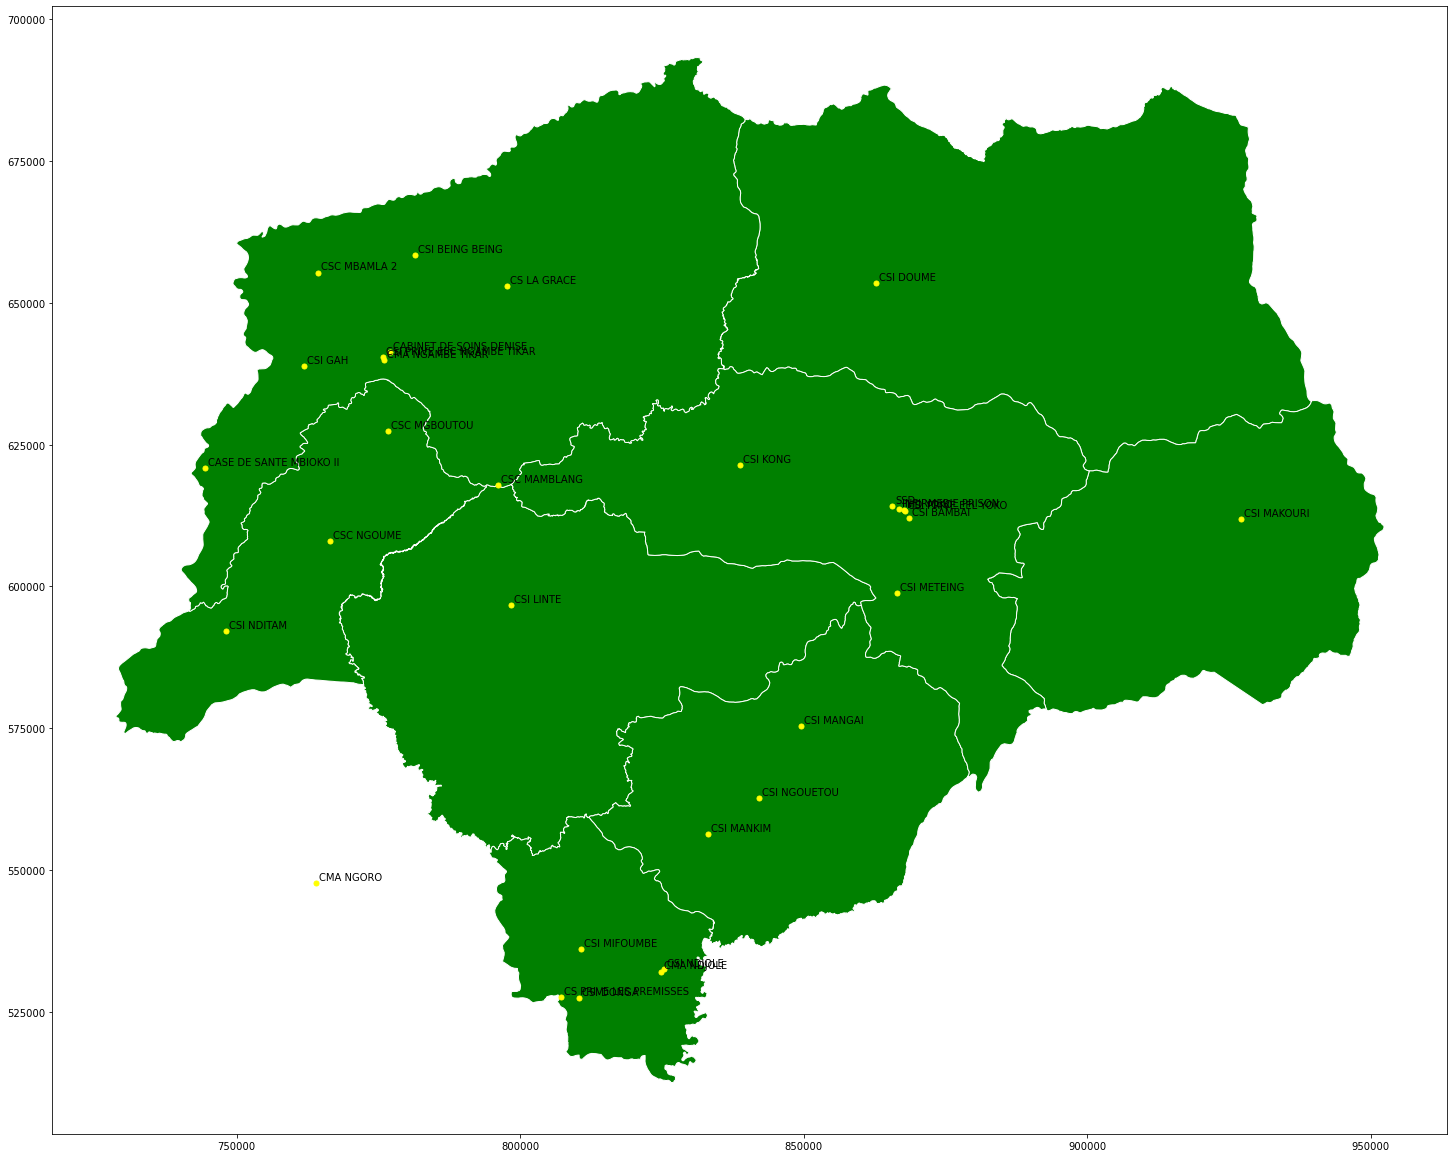

In [84]:
# Plot of the parks and mining sites
ax = district_utm_32632.plot(figsize=(25,25), color='green', edgecolor='white')
fosas_utm_32632.plot(ax=ax, markersize=25, color='yellow')

for x, y, label in zip(fosas_utm_32632.geometry.x, fosas_utm_32632.geometry.y, fosas_utm_32632.NAME):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.show()

In [85]:
fosas_utm_32632_buffered = fosas_utm_32632.copy()

In [86]:
fosas_utm_32632_buffered['geometry'] = fosas_utm_32632_buffered.apply(lambda row:row.geometry.buffer(5000),axis=1)

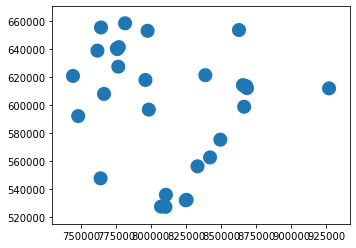

In [87]:
fosas_utm_32632_buffered.plot()
plt.show()

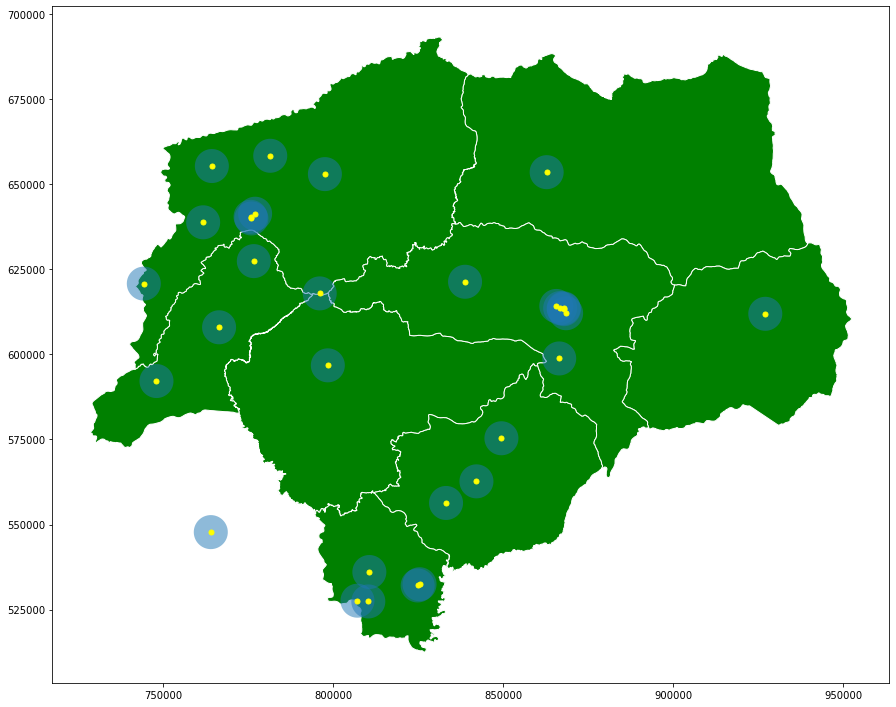

In [88]:
# Plot of the parks and mining sites
ax = district_utm_32632.plot(figsize=(15,15), color='green', edgecolor='white')
fosas_utm_32632_buffered.plot(ax=ax, alpha=0.5)
fosas_utm_32632.plot(ax=ax, markersize=25, color='yellow')

plt.show()

In [89]:
district_map = folium.Map(location=district_location, zoom_start=8)
folium.GeoJson(district_utm_32632.geometry).add_to(district_map)
folium.GeoJson(fosas_utm_32632.geometry).add_to(district_map)
folium.GeoJson(fosas_utm_32632_buffered.geometry).add_to(district_map)
display(district_map)

### Area

In [90]:
district_utm_32632.geometry.area

0    4.783623e+09
1    3.277116e+09
2    2.608273e+09
3    2.313289e+09
4    1.666343e+09
5    1.142068e+09
6    4.536774e+09
7    3.108962e+09
dtype: float64

In [91]:
district_utm_32632.geometry.area.sum()/1e6

23436.448328891158

In [92]:
(23436/475000)*100

4.933894736842105

In [94]:
pois_in_djole['Type de poi'].value_counts()

Carrefour                                                    35
Source d'eau                                                 27
Domicile de relais de communautaire                          23
Domicile de chef de quartier                                 15
Lieu de culte                                                14
Ecole                                                        11
Autre                                                         9
Site de stratégie avancée (vaccination, CPN recentrée...)     8
Formation sanitaire                                           5
Domicile de tradi-praticien                                   4
Pont                                                          4
Marché                                                        3
Name: Type de poi, dtype: int64